**Import modules**

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

import sqlite3
import zipfile

plt.style.use('dark_background')

**Read in the wildfire dataset and display columns**

- Download dataset from https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires/data
- unzip into /data directory

In [3]:
# extract the zipped dataset

with zipfile.ZipFile('./data/archive.zip', 'r') as zipped:
    zipped.extractall('./data/')

In [4]:
# connect to the sqlite database
conn = sqlite3.connect('data/FPA_FOD_20170508.sqlite')

In [5]:
tables = pd.read_sql_query(
    """
    SELECT name FROM sqlite_master WHERE type='table'
    """
    , conn)

In [6]:
# Print out the table names
tables

name
0                      spatial_ref_sys
1                   spatialite_history
2                      sqlite_sequence
3                     geometry_columns
4                  spatial_ref_sys_aux
5               views_geometry_columns
6               virts_geometry_columns
7          geometry_columns_statistics
8    views_geometry_columns_statistics
9    virts_geometry_columns_statistics
10        geometry_columns_field_infos
11  views_geometry_columns_field_infos
12  virts_geometry_columns_field_infos
13               geometry_columns_time
14               geometry_columns_auth
15         views_geometry_columns_auth
16         virts_geometry_columns_auth
17                  sql_statements_log
18                        SpatialIndex
19                ElementaryGeometries
20                                 KNN
21                               Fires
22                     idx_Fires_Shape
23                idx_Fires_Shape_node
24               idx_Fires_Shape_rowid
25              idx_Fires_Shape_parent
26          NWCG_UnitIDActive_20170109

**Utilizing Fires Table**

In [11]:
# read in the fires table


wildfireDf = pd.read_sql_query(
    """
    SELECT * 
    FROM fires
    WHERE FIRE_YEAR > 2005
    """
    , conn)

**Exploratory Data Analysis**
Display the first 5 rows

In [12]:
wildfireDf.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [13]:
# Describe the dataset
wildfireDf.describe

<bound method NDFrame.describe of         OBJECTID     FOD_ID             FPA_ID SOURCE_SYSTEM_TYPE  \
0           2259       2274         FS-1423892                FED   
1           5841       5867         FS-1429962                FED   
2           6351       6380         FS-1430814                FED   
3           6372       6401         FS-1430851                FED   
4           6391       6420         FS-1430883                FED   
...          ...        ...                ...                ...   
823509   1880461  300348363  2015CAIRS29019636             NONFED   
823510   1880462  300348373  2015CAIRS29217935             NONFED   
823511   1880463  300348375  2015CAIRS28364460             NONFED   
823512   1880464  300348377  2015CAIRS29218079             NONFED   
823513   1880465  300348399  2015CAIRS26733926             NONFED   

       SOURCE_SYSTEM NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
0        FS-FIRESTAT                    FS                USMTBDF   

In [17]:
#TODO: Naveen
#Clean dataframe, later drop columns we don't end up using
# don't drop na


In [14]:
wildfireAnalysisDf = wildfireDf.drop_duplicates()

In [23]:
wildfireAnalysisDf.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [15]:
wildfireAnalysisDf.describe

<bound method NDFrame.describe of         OBJECTID     FOD_ID             FPA_ID SOURCE_SYSTEM_TYPE  \
0           2259       2274         FS-1423892                FED   
1           5841       5867         FS-1429962                FED   
2           6351       6380         FS-1430814                FED   
3           6372       6401         FS-1430851                FED   
4           6391       6420         FS-1430883                FED   
...          ...        ...                ...                ...   
823509   1880461  300348363  2015CAIRS29019636             NONFED   
823510   1880462  300348373  2015CAIRS29217935             NONFED   
823511   1880463  300348375  2015CAIRS28364460             NONFED   
823512   1880464  300348377  2015CAIRS29218079             NONFED   
823513   1880465  300348399  2015CAIRS26733926             NONFED   

       SOURCE_SYSTEM NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
0        FS-FIRESTAT                    FS                USMTBDF   

In [35]:
wildfireAnalysisDf["CONT_DOY"].head()

0     33.0
1    133.0
2    152.0
3    185.0
4    185.0
Name: CONT_DOY, dtype: float64

In [39]:
import datetime
#TODO: Naveen
# investigate convert _DATE columns to Date type


'03/09/8617'

In [ ]:
#TODO: Rajeev
#Visualize fire count by state

In [51]:
#TODO: Connor
#Visualize lat/lon scattermap
import plotly.express as px
mapDf = pd.read_sql_query(
    """
    SELECT *
    FROM fires
    WHERE FIRE_YEAR > 2014
    
    """
    , conn)
fig = px.scatter_mapbox(mapDf, lat="LATITUDE", lon="LONGITUDE", center={"lat":45.75,"lon":-118.74}, hover_name="COUNTY", hover_data=["FIRE_YEAR", "FIRE_SIZE"],
                        color_discrete_sequence=["fuchsia"], zoom=5, height=600, title="Wildfires in 2014")
fig.update_layout(mapbox_style="open-street-map")
fig.show()


In [15]:
mapDf.head()

OBJECTID     FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0   1789012  300200261  FS-6341424                FED   FS-FIRESTAT   
1   1789013  300200262  FS-6341435                FED   FS-FIRESTAT   
2   1789014  300200263  FS-6332443                FED   FS-FIRESTAT   
3   1789015  300200264  FS-6341423                FED   FS-FIRESTAT   
4   1789016  300200265  FS-6351412                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
0                    FS                USMTBDF   
1                    FS                USMTBDF   
2                    FS                USMTBDF   
3                    FS                USMTBDF   
4                    FS                USMTBDF   

               NWCG_REPORTING_UNIT_NAME SOURCE_REPORTING_UNIT  \
0  Beaverhead/Deerlodge National Forest                  0102   
1  Beaverhead/Deerlodge National Forest                  0102   
2  Beaverhead/Deerlodge National Forest                  0102   
3  Beaverhead/Deerlodge National Forest                  0102   
4  Beaverhead/Deerlodge National Forest                  0102   

             SOURCE_REPORTING_UNIT_NAME  ... FIRE_SIZE_CLASS   LATITUDE  \
0  Beaverhead/Deerlodge National Forest  ...               A  45.934167   
1  Beaverhead/Deerlodge National Forest  ...               G  45.515278   
2  Beaverhead/Deerlodge National Forest  ...               A  45.727222   
3  Beaverhead/Deerlodge National Forest  ...               A  45.455556   
4  Beaverhead/Deerlodge National Forest  ...               A  44.416667   

    LONGITUDE OWNER_CODE OWNER_DESCR STATE COUNTY FIPS_CODE   FIPS_NAME  \
0 -113.020833        5.0        USFS    MT    001       001  Beaverhead   
1 -113.245278        5.0        USFS    MT    001       001  Beaverhead   
2 -112.943889        5.0        USFS    MT    001       001  Beaverhead   
3 -113.749722        5.0        USFS    MT    001       001  Beaverhead   
4 -112.843333        5.0        USFS    MT    001       001  Beaverhead   

                                               Shape  
0  b'\x00\x01\xad\x10\x00\x00\x10\xc1QUUA\\\xc0\x...  
1  b'\x00\x01\xad\x10\x00\x00D\xe2\x92\xa1\xb2O\\...  
2  b'\x00\x01\xad\x10\x00\x00\xe4f\xf2\xach<\\\xc...  
3  b'\x00\x01\xad\x10\x00\x00\x00\xff\xe7r\xfbo\\...  
4  b'\x00\x01\xad\x10\x00\x00\x80\xfe[,\xf95\\\xc...  

[5 rows x 39 columns]

In [30]:
countyDf = pd.read_sql_query(
    """
    SELECT STATE, COUNT(*) AS Count
    FROM fires
    GROUP BY STATE
    
    """
    , conn)

In [41]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import plotly.express as px

fig = px.choropleth(countyDf, locations='STATE', color='Count',
    locationmode="USA-states",
    color_continuous_scale="Reds",
    scope="usa",
    labels={'Count':'Wildfire Count'},
    title="Wildfire Count By State"
)
fig.show()

In [29]:
countyDf.head()

STATE COUNTY   Count
0    CA   None  678148
1    MI    001     641
2    ID    003     791
3    AR    005    1712
4    NM    006      58

In [ ]:
#TODO: Connor
#Investigate time series heatmap

In [58]:
#TODO: Connor
#Visualize fire count over time
firesOverTimeDf = pd.read_sql_query(
    """
    SELECT FIRE_YEAR, COUNT(*) AS Count
    FROM fires
    GROUP BY FIRE_YEAR
    """
    , conn)


In [19]:
# Check the first 5 rows
firesOverTimeDf.head()

FIRE_YEAR  Count
0       1992  67975
1       1993  61989
2       1994  75955
3       1995  71472
4       1996  75574

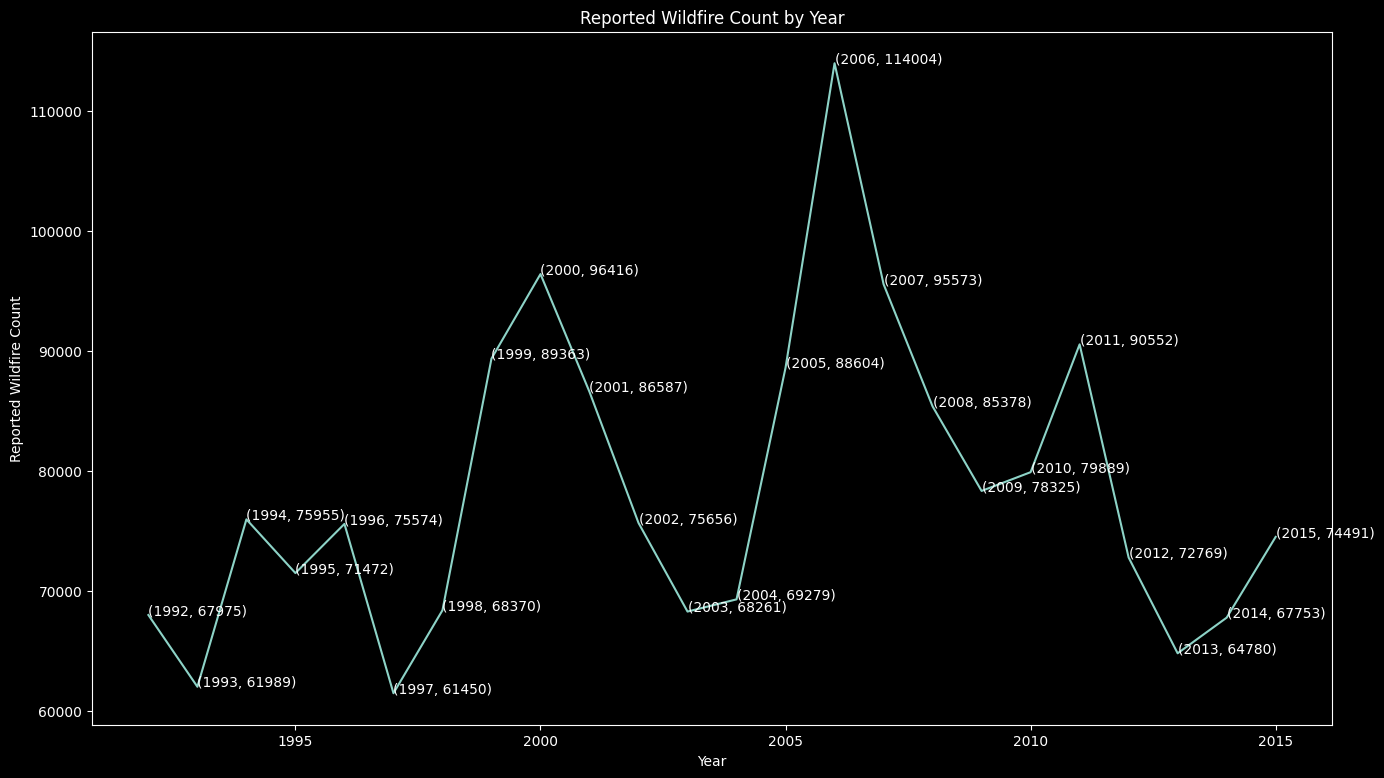

In [61]:
# create plot
fig, ax = plt.subplots(figsize =(16, 9))
ax.plot(firesOverTimeDf["FIRE_YEAR"],firesOverTimeDf["Count"])
plt.xlabel("Year")
plt.ylabel("Reported Wildfire Count")
plt.title("Reported Wildfire Count by Year")
# add annotation to points
for (i, j) in zip(firesOverTimeDf["FIRE_YEAR"],firesOverTimeDf["Count"]):
    plt.text(i, j, f'({i}, {j})')


In [ ]:
#TODO: Naveen
#Visualize avg fire size over time

In [ ]:
#TODO: Rajeev
#Plot fire count by DISCOVERY_DOY, or DISCOVERY_DATE investigate converting to month

In [ ]:
#TODO: Rajeev
#Plot fire count by CONT_DOY, or CONT_DATE investigate converting to month

In [33]:
#TODO: Naveen
#Create a new column of duration of fire (CONT_DOY-DISCOVERY_DOY)

In [ ]:
#TODO: Naveen
#Plot Duration by time
#Plot duration by Fire_Size

In [41]:
#TODO: Connor
#Visualize fire count by STAT_CAUSE_CODE/desc (cause), label with description

fireCausesDf = pd.read_sql_query(
    """
    SELECT STAT_CAUSE_DESCR, COUNT(*) AS Count
    FROM fires
    GROUP BY STAT_CAUSE_DESCR
    ORDER BY COUNT(*) DESC
    """
    , conn)


In [42]:
# Check first 5 rows
fireCausesDf

STAT_CAUSE_DESCR   Count
0      Debris Burning  429028
1       Miscellaneous  323805
2               Arson  281455
3           Lightning  278468
4   Missing/Undefined  166723
5       Equipment Use  147612
6            Campfire   76139
7            Children   61167
8             Smoking   52869
9            Railroad   33455
10          Powerline   14448
11          Fireworks   11500
12          Structure    3796

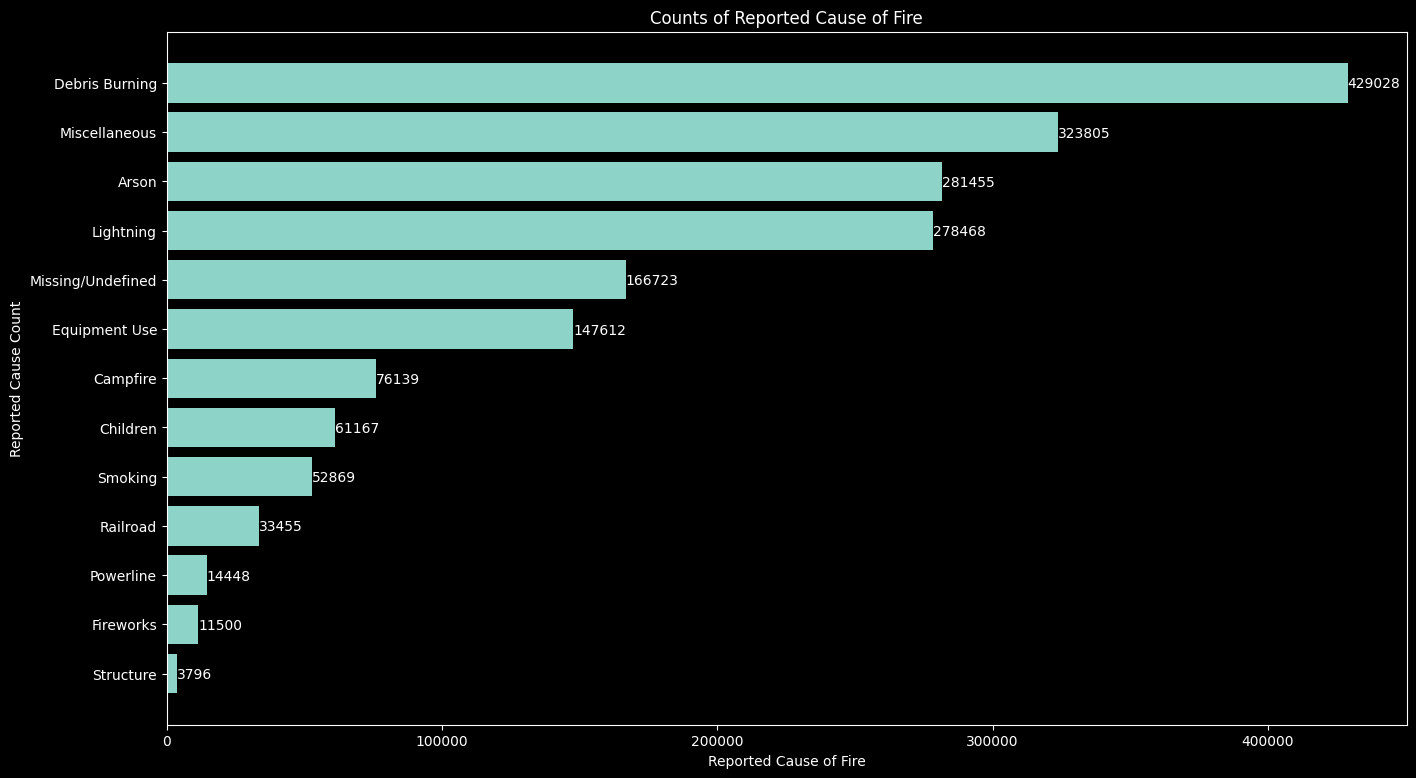

In [55]:
# create plot
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(fireCausesDf["STAT_CAUSE_DESCR"],fireCausesDf["Count"])
# add title and labels
plt.xlabel("Reported Cause of Fire")
plt.ylabel("Reported Cause Count")
plt.title("Counts of Reported Cause of Fire")
# invert order so highest first
plt.gca().invert_yaxis()
# add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
        str(round((i.get_width()), 2)))
